# Classifying Wines

#### Cleaning, Transforming, Reducing data to apply different classification methods to determine the type of wine

###### The Dataset:

We are using Corez & Cerderia's (2009) datasets on Portuguese 'Vinho Verde' wines. The authors used the results of physicochemical properties of each wine (e.g. pH, chlorides, density, acidity...) to predict the average quality score (/10) awarded to it by experts. 

The dataset has 11 input variables and 1 output variable (quality). It is provided as two csv files, one with 1599 red wine datapoints, and the other with 4898 white wine data points. As such, it is imbalanced. 

We will be using the input variables to compare different methods of classification, and determine which can sort wines by colour the best depending on their physiochemical properties. Our first steps will be to clean the data, then transform it, then reduce it if needed, evaluating the benefit from each step, before attempting to classify. 

We will compare 3 methods of classification: K-nearest neighbours, Decision Trees, and Support Vector Machine.



#### 1: Loading and previewing the data

In [1]:
import pandas as pd

red_wines_raw= pd.read_csv('winequality-red.csv')
white_wines_raw= pd.read_csv('winequality-white.csv')

In [2]:
white_wines_raw

fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"
0      7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6                                                                                                                     
1     6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9...                                                                                                                     
2     8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;1...                                                                                                                     
3     7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...                                                                                                                     
4     7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...                                                                                                                     
...                                                 ...                                                                                                                     
4893  6.2;0.21;0.29;1.6;0.039;24;92;0.99114;3.27;0.5...                                                                                                                     
4894  6.6;0.32;0.36;8;0.047;57;168;0.9949;3.15;0.46;...                                                                                                                     
4895  6.5;0.24;0.19;1.2;0.041;30;111;0.99254;2.99;0....                                                                                                                     
4896  5.5;0.29;0.3;1.1;0.022;20;110;0.98869;3.34;0.3...                                                                                                                     
4897  6;0.21;0.38;0.8;0.02;22;98;0.98941;3.26;0.32;1...                                                                                                                     

[4898 rows x 1 columns]

Unfortunately all of our data is squished into one column! But on the bright side it appears that all values are separated by a semicolon, so this shouldn't be too hard to fix. We need to first save the column names, then separate the values into different columns, and then finally clean the column names and bring them back to the dataframe

In [3]:
#save column titles
columns_white= white_wines_raw.columns
columns_red= red_wines_raw.columns
#split column into multiple using ';' delimiter
white_wines_raw= white_wines_raw[columns_white[0]].str.split(';', expand=True)
red_wines_raw= red_wines_raw[columns_red[0]].str.split(';', expand=True)

red_wines_raw

0      1     2    3      4   5   6        7     8     9     10 11
0      7.4    0.7     0  1.9  0.076  11  34   0.9978  3.51  0.56   9.4  5
1      7.8   0.88     0  2.6  0.098  25  67   0.9968   3.2  0.68   9.8  5
2      7.8   0.76  0.04  2.3  0.092  15  54    0.997  3.26  0.65   9.8  5
3     11.2   0.28  0.56  1.9  0.075  17  60    0.998  3.16  0.58   9.8  6
4      7.4    0.7     0  1.9  0.076  11  34   0.9978  3.51  0.56   9.4  5
...    ...    ...   ...  ...    ...  ..  ..      ...   ...   ...   ... ..
1594   6.2    0.6  0.08    2   0.09  32  44   0.9949  3.45  0.58  10.5  5
1595   5.9   0.55   0.1  2.2  0.062  39  51  0.99512  3.52  0.76  11.2  6
1596   6.3   0.51  0.13  2.3  0.076  29  40  0.99574  3.42  0.75    11  6
1597   5.9  0.645  0.12    2  0.075  32  44  0.99547  3.57  0.71  10.2  5
1598     6   0.31  0.47  3.6  0.067  18  42  0.99549  3.39  0.66    11  6

[1599 rows x 12 columns]

In [4]:
def cleancolumns(columns):
    squashed_cols= list(columns.str.split(';')) #turn this index into a list with all names in 1 item
    messy_cols= list(str(squashed_cols[0]).split(',')) #separate into different items, but tiles have weird characters
    
    #simple function to remove unwanted characters from text
    import re
    def nospecial(text):
        text = re.sub("[^a-zA-Z0-9\s]+", "",text)
        return text
    
    clean_cols=[]
    for col in messy_cols:
        col= nospecial(col)
        if col[0]==" ":
            col= col[1:len(col)]
        clean_cols.append(col)
    
    return clean_cols

In [5]:
white_wines_raw.columns = cleancolumns(columns_white)
red_wines_raw.columns = cleancolumns(columns_red)

In [6]:
red_wines_raw

fixed acidity volatile acidity citric acid residual sugar chlorides  \
0              7.4              0.7           0            1.9     0.076   
1              7.8             0.88           0            2.6     0.098   
2              7.8             0.76        0.04            2.3     0.092   
3             11.2             0.28        0.56            1.9     0.075   
4              7.4              0.7           0            1.9     0.076   
...            ...              ...         ...            ...       ...   
1594           6.2              0.6        0.08              2      0.09   
1595           5.9             0.55         0.1            2.2     0.062   
1596           6.3             0.51        0.13            2.3     0.076   
1597           5.9            0.645        0.12              2     0.075   
1598             6             0.31        0.47            3.6     0.067   

     free sulfur dioxide total sulfur dioxide  density    pH sulphates  \
0                     11                   34   0.9978  3.51      0.56   
1                     25                   67   0.9968   3.2      0.68   
2                     15                   54    0.997  3.26      0.65   
3                     17                   60    0.998  3.16      0.58   
4                     11                   34   0.9978  3.51      0.56   
...                  ...                  ...      ...   ...       ...   
1594                  32                   44   0.9949  3.45      0.58   
1595                  39                   51  0.99512  3.52      0.76   
1596                  29                   40  0.99574  3.42      0.75   
1597                  32                   44  0.99547  3.57      0.71   
1598                  18                   42  0.99549  3.39      0.66   

     alcohol quality  
0        9.4       5  
1        9.8       5  
2        9.8       5  
3        9.8       6  
4        9.4       5  
...      ...     ...  
1594    10.5       5  
1595    11.2       6  
1596      11       6  
1597    10.2       5  
1598      11       6  

[1599 rows x 12 columns]

Great! Our table is now looking as it should- but that doesn't mean it's ready for analysis just yet! We need to check whether all values are numeric, what the distributions are, and then figure out how to standardise our data for analysis

#### 2: Exploring Data

_Part A_ Finding missing values and non-numeric entries.

i) Finding Non-numeric values

In [7]:
def count_non_numerics(df):
    columns = df.columns
    df2= pd.DataFrame(columns=columns)
    
    countlist=[]
    for col in columns:
        count = 0
        for v in df[col]:
            if type(v) != (float or int):
                count +=1
        countlist.append(count)
    
    df2.loc[0]=countlist
    
    return df2

In [8]:
count_non_numerics(white_wines_raw)

fixed acidity volatile acidity citric acid residual sugar chlorides  \
0          4898             4898        4898           4898      4898   

  free sulfur dioxide total sulfur dioxide density    pH sulphates alcohol  \
0                4898                 4898    4898  4898      4898    4898   

  quality  
0    4898

In [9]:
count_non_numerics(red_wines_raw)

fixed acidity volatile acidity citric acid residual sugar chlorides  \
0          1599             1599        1599           1599      1599   

  free sulfur dioxide total sulfur dioxide density    pH sulphates alcohol  \
0                1599                 1599    1599  1599      1599    1599   

  quality  
0    1599

It looks like all of our values are non-numeric! This would have prevented us from any further analysis- so it was important that we checked. 


In [10]:
# confirming that the values are stored as strings
print(type(white_wines_raw['fixed acidity'][0])) 
# Convert all values to float

white_wines= white_wines_raw.astype(float)
red_wines= red_wines_raw.astype(float)


<class 'str'>


In [11]:
count_non_numerics(white_wines)

fixed acidity volatile acidity citric acid residual sugar chlorides  \
0             0                0           0              0         0   

  free sulfur dioxide total sulfur dioxide density pH sulphates alcohol  \
0                   0                    0       0  0         0       0   

  quality  
0       0

In [12]:
count_non_numerics(red_wines)

fixed acidity volatile acidity citric acid residual sugar chlorides  \
0             0                0           0              0         0   

  free sulfur dioxide total sulfur dioxide density pH sulphates alcohol  \
0                   0                    0       0  0         0       0   

  quality  
0       0

ii) All better! Now lets create some summary statistics for each column

In [13]:
white_wines.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  4898.000000  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267     5.877909  
std       0.151001     0.114126     1.230621     0.885639  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.470000    10.400000     6.000000  
75%       3.280000     0.550000    11.400000     6.000000  
max       3.820000     1.080000    14.200000     9.000000

In [14]:
red_wines.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

This is a really important stage. If anything looks weird in our data, this is the best time to catch it (otherwise we'll inevitably find it at a later stage more painfully- or worse, not find it). What are we looking for?

_Counts_: These are the same across all variables, so that is a good start. We know already that there are more white wines than red wines in our data, and we'll address that later. 

_Outliers_: Comparing the max and min values in each column to their closest quartiles, we see that we may have some serious outliers in the first 7 columns, since the max values are much higher than their 75% levels. We will decide whether or not to include these outliers in a later step.

_Averages_: Comparing both groups, we see that the average quality (our dependent variable) is higher for white wines than red, so this is something to keep in mind. The averages in other categories, e.g. total sulfur dioxide, also vary considerably between the two. This can actually help us when it comes to classifying the wines

Our next step is to visualise the data, using histograms.



#### 3: Visualising Data

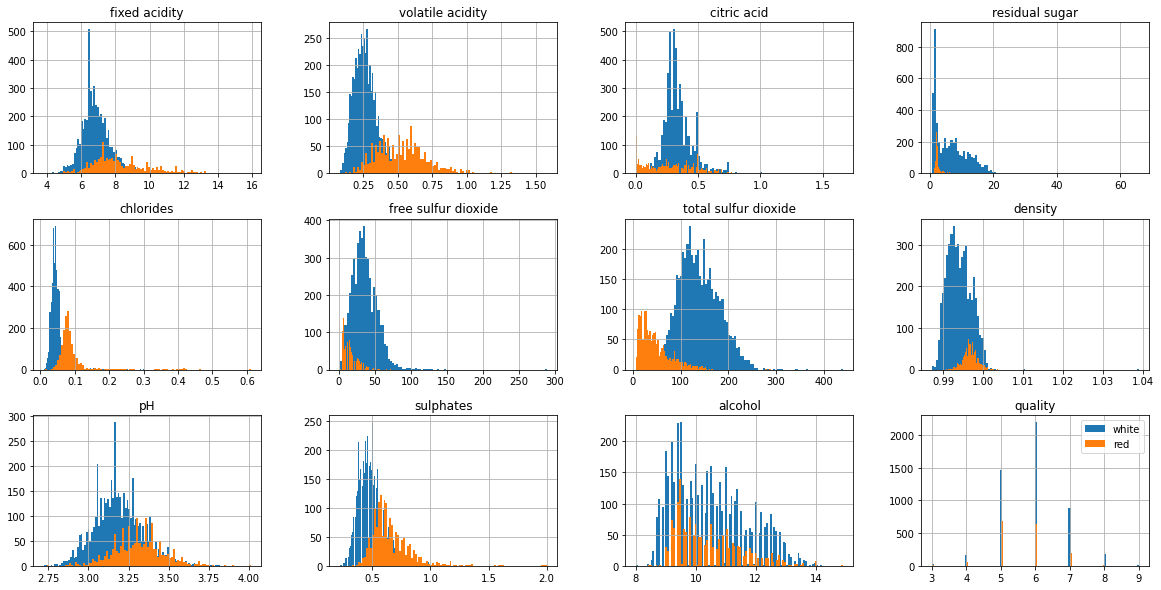

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axis = plt.subplots(3,4,figsize=(20, 10))
white_wines.hist(ax=axis, bins=100, label='white')
red_wines.hist(ax=axis, bins=100, label= 'red')
plt.legend(loc='upper right')

It is only by visualising our data can we really get a sense of how it's distributed. Now we can see how the two types of wine vary significantly when it specifically comes to acidity and sulphates, which is cool. But what is more concerning is the white space in our plots- indicating the presence of extreme values, or outliers, that we now need to address. 

##### Outliers:
If we had some domain knowledge about the chemical tests performed, we could approach each category differently in our treatment of extreme values, e.g. we may know that it is impossible to have a chloride value above 0.3, so all data above this is invalid. However, since we don't have any domain knowledge, we need a general way to treat our outliers. 

We could take z-scores and filter anything greater than 2-3 standard deviations from the mean, but in this case, I think it is best to remove the most extreme %ile of outliers from our data instead. What is this %? It's not an exact science, but let's start with 99% and work our way down, checking the number of incidences we have removed each time, and plotting our new distributions. 

Note: We won't be performing this on our quality category, since this data is within the 1-10 ranking, and is also what we are aiming to predict! 

In [16]:
cols = list(white_wines.columns)[0:-1] #excludes 'quality'

Q1w, Q1r = white_wines[cols].quantile(0.005), red_wines[cols].quantile(0.005)
Q3w, Q3r = white_wines[cols].quantile(0.995), red_wines[cols].quantile(0.995)

white_wines_trimmed = white_wines[~((white_wines[cols] < (Q1w)) |(white_wines[cols] > (Q3w))).any(axis=1)]
red_wines_trimmed= red_wines[~((red_wines[cols] < (Q1r)) |(red_wines[cols] > (Q3r))).any(axis=1)]

print("White wines: Kept " + str(white_wines_trimmed.shape[0]) + " out of " + str(white_wines.shape[0]) + ", " + 
      str(round((white_wines_trimmed.shape[0]/white_wines.shape[0] -1)*100, 2)) + "% change")
print("Red wines: Kept " + str(red_wines_trimmed.shape[0]) + " out of " + str(red_wines.shape[0]) + ", " +
      str(round((red_wines_trimmed.shape[0]/red_wines.shape[0] -1)*100, 2)) + "% change")

White wines: Kept 4501 out of 4898, -8.11% change
Red wines: Kept 1498 out of 1599, -6.32% change


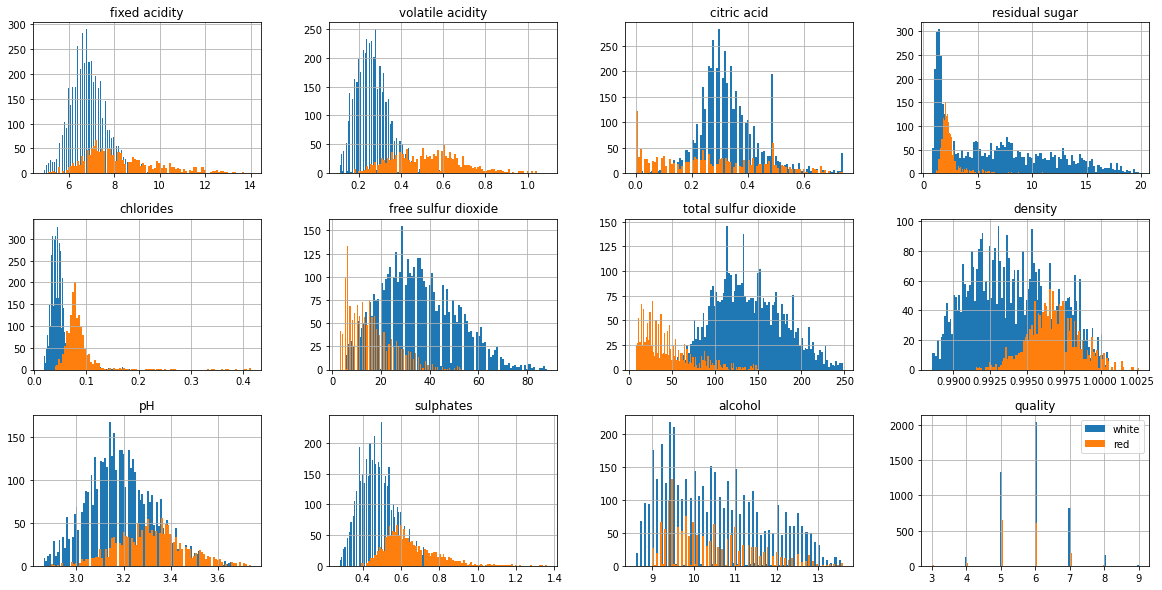

In [17]:
fig, axis = plt.subplots(3,4,figsize=(20, 10))
white_wines_trimmed.hist(ax=axis, bins=100, label='white')
red_wines_trimmed.hist(ax=axis, bins=100, label= 'red')
plt.legend(loc='upper right')

This looks a lot better. We have eliminated the most extreme 1% of outliers from each column while keeping most of the data intact. But note that since we deleted all rows with at least 1 outlier, we actually lost about 8% of the white wines data, and 6% of the red wines data. Since our datasets are still quite big, we can still continue without major issue. 

Another point to note is that we clipped the bottom 0.5% of data as well. For a bunch of the categories, the lower bound is 0, so we might not want to eliminate the values close to zero as these may be valid. But hey, what's a shortcut.

#### 4: Data Transformation

In order to perform some data analysis techniques such as PCA, we need our data to be on the same scale, i.e. we can't have one category having a max value of 0.9, and another having a max of 300. In the case of PCA, we need our data to be standardised, that is have a mean of 0, and standard deviation of 1. We'll perform this to all of our attributes, except quality.

In [18]:
import warnings
warnings.filterwarnings('ignore') #we get a warning here but can ignore

from sklearn.preprocessing import StandardScaler
cols = list(white_wines.columns)[0:-1] #excludes 'quality'
white_wines_std_full, red_wines_std_full = white_wines_trimmed, red_wines_trimmed

white_wines_std_full[cols]= StandardScaler().fit_transform(white_wines_trimmed[cols]) #calling it 'full' since it includes Quality
red_wines_std_full[cols]= StandardScaler().fit_transform(red_wines_trimmed[cols])

white_wines_std = white_wines_std_full.drop(columns= 'quality')
red_wines_std = red_wines_std_full.drop(columns= 'quality') #these don't include quality

red_wines_std.describe()


fixed acidity  volatile acidity   citric acid  residual sugar  \
count   1.498000e+03      1.498000e+03  1.498000e+03    1.498000e+03   
mean   -7.589242e-16     -1.660147e-16 -1.138386e-16    1.422983e-16   
std     1.000334e+00      1.000334e+00  1.000334e+00    1.000334e+00   
min    -2.008098e+00     -2.065694e+00 -1.395005e+00   -1.158469e+00   
25%    -7.310698e-01     -7.592465e-01 -9.226579e-01   -5.222470e-01   
50%    -2.445830e-01     -4.663900e-02 -8.292885e-02   -2.495804e-01   
75%     5.459580e-01      6.585455e-01  8.092832e-01    1.139751e-01   
max     3.464879e+00      3.338247e+00  2.488741e+00    7.748641e+00   

          chlorides  free sulfur dioxide  total sulfur dioxide       density  \
count  1.498000e+03         1.498000e+03          1.498000e+03  1.498000e+03   
mean   1.422983e-16        -8.537897e-17          9.486552e-18  2.959804e-15   
std    1.000334e+00         1.000334e+00          1.000334e+00  1.000334e+00   
min   -1.279616e+00        -1.283545e+00         -1.215089e+00 -3.040455e+00   
25%   -3.898743e-01        -8.746559e-01         -7.578663e-01 -6.427185e-01   
50%   -1.674390e-01        -2.613220e-01         -2.679849e-01 -7.173886e-03   
75%    1.314584e-01         5.564565e-01          4.831665e-01  5.994823e-01   
max    9.147039e+00         3.827571e+00          3.455113e+00  3.372768e+00   

                 pH     sulphates       alcohol  
count  1.498000e+03  1.498000e+03  1.498000e+03  
mean  -3.035697e-16  2.371638e-16  6.640586e-16  
std    1.000334e+00  1.000334e+00  1.000334e+00  
min   -2.987482e+00 -1.807421e+00 -1.378472e+00  
25%   -7.296432e-01 -6.959323e-01 -8.843112e-01  
50%   -2.406866e-02 -2.096561e-01 -2.913176e-01  
75%    6.109484e-01  4.850240e-01  5.981727e-01  
max    3.009902e+00  4.930977e+00  3.167811e+00

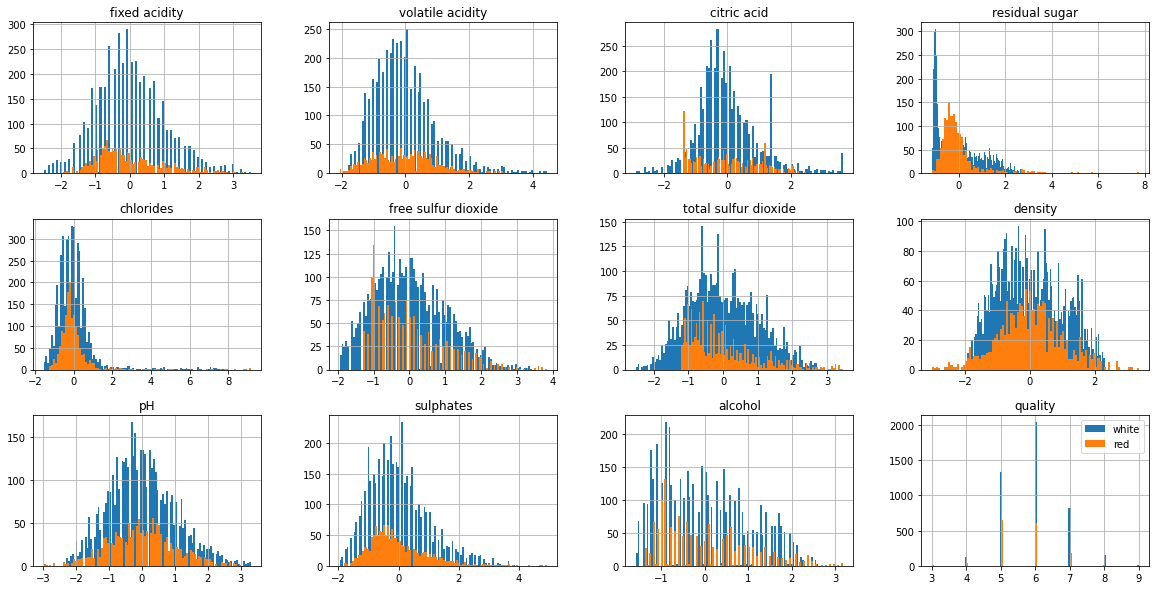

In [19]:
fig, axis = plt.subplots(3,4,figsize=(20, 10))
white_wines_std_full.hist(ax=axis, bins=100, label='white')
red_wines_std_full.hist(ax=axis, bins=100, label= 'red')
plt.legend(loc='upper right')

#### 5: Sampling Data and Creating Test & Training Set

As we are first looking to classify wines into each colour, it doesn't make sense to apply PCA and other analysis techniques to our dataset of red and wine wines separately, since the wines we test our model on are of unknown type. 

Simply combining the datasets would not be helpful, since there are about four times more white wines than reds in our data, and in the real world we know that there are roughly equal proportions of each. So, in both our training and testing sets we should aim for a 50/50 split between reds and whites. 



In [20]:
white_wines_std['type']= 1
red_wines_std['type']= 0

from sklearn.model_selection import train_test_split

#take random sample of white wines equal to our number of red wines, then get train/test split
train_w, test_w = train_test_split(white_wines_std.sample(red_wines_std.shape[0]), test_size=0.2)
train_r, test_r = train_test_split(red_wines_std, test_size=0.2)

print(train_w.shape[0])
print(test_w.shape[0])
print(train_r.shape[0])
print(test_r.shape[0]) # our proportions of red and white in the training and testing samples are equal

train_df= pd.concat([train_w, train_r], axis=0)
test_df= pd.concat([test_w, test_r], axis=0) #combining our data

train_df= train_df.reset_index()
test_df= test_df.reset_index()

train_df= train_df.drop(columns= 'index')
test_df= test_df.drop(columns= 'index')

train_df

1198
300
1198
300


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0         -0.073895          0.277927    -0.030296        1.311835  -0.233710   
1         -2.252353          0.277927    -0.299965       -0.838465   0.168513   
2          2.360853          0.716299     1.138270        1.516626   0.570736   
3         -0.330184          0.277927    -0.839303       -1.063734  -0.635933   
4         -0.842762          1.264265    -0.839303       -0.326489  -0.463552   
...             ...               ...          ...             ...        ...   
2391       1.275688          0.279973     1.806461        0.113975  -0.250852   
2392       1.336499         -1.590622     1.071699       -0.522247  -0.195243   
2393      -0.122961         -0.878014     1.124182       -0.613136   2.001305   
2394      -0.913502         -0.284175    -0.975141       -0.613136  -0.306461   
2395      -1.460800         -0.402943    -1.395005       -0.522247  -0.223048   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
0                1.609790              0.732340  0.900500 -0.618456   
1                0.315875              0.285189 -1.626338  0.710432   
2                2.127356              1.477591  1.681523  1.200022   
3               -1.172127             -0.435221 -0.262198 -0.408632   
4                0.639354             -0.012912 -0.813509  0.290783   
...                   ...                   ...       ...       ...   
2391            -0.465767             -0.692549  1.870571 -1.082430   
2392            -0.976878             -0.692549  0.483929 -0.941316   
2393            -1.079101             -0.921160  0.483929 -0.094626   
2394             2.498681              0.613801 -0.850715 -1.364660   
2395             0.965346             -0.039374 -1.682701  1.316523   

      sulphates   alcohol  type  
0      0.671045 -0.579429     1  
1     -0.269032  1.430665     1  
2     -1.115101 -0.830691     1  
3     -1.209109 -1.081953     1  
4     -0.551055  0.593126     1  
...         ...       ...   ...  
2391   0.276620 -1.378472     0  
2392   2.708001  0.499340     0  
2393   2.777469 -0.983143     0  
2394  -1.112740 -0.785479     0  
2395  -0.834868  0.795837     0  

[2396 rows x 12 columns]

#### 6: Principal Components Analysis (PCA)  

PCA is a data transformation technique that finds and ranks the combinations of our attributes in terms of how well they separate our data (largest variance). We can then use these new principal components to reduce the dimensionality of our data while still preserving a desired level of richness. 


In [21]:
from sklearn.decomposition import PCA
train_data = train_df.drop(columns= 'type')
n = 10 #number of components
pca = PCA(n_components = n)
pca_t = pca.fit_transform(train_data)

cols = []
for i in range(1,n+1):
    x= "PC {}".format(i)
    cols.append(x)

pca_df= pd.DataFrame(data= pca_t, columns= cols)

print('Total Variance Explained: {}'.format(pca.explained_variance_ratio_.sum()))

Total Variance Explained: 0.9910596492821669


In [22]:
x= list(train_data.columns)
x= x + ['Variance Explained', 'Cumulative Variance']

loadings = pd.DataFrame(pca.components_.T, columns=cols)
loadings.loc[len(loadings)]=list(pca.explained_variance_ratio_)
loadings.loc[len(loadings)]=list(pca.explained_variance_ratio_.cumsum())

loadings= loadings.set_axis(x)
loadings

PC 1      PC 2      PC 3      PC 4      PC 5  \
fixed acidity         0.334325 -0.433337 -0.122046 -0.195370 -0.132271   
volatile acidity     -0.073869  0.321103 -0.424801  0.005438 -0.074064   
citric acid           0.290484 -0.421935  0.265980 -0.031580 -0.061493   
residual sugar        0.360991  0.172938 -0.090986 -0.328166  0.519188   
chlorides             0.214695  0.002090 -0.131856  0.784618 -0.137972   
free sulfur dioxide   0.232651  0.377723  0.497939 -0.125729 -0.308988   
total sulfur dioxide  0.317231  0.378860  0.303990 -0.059216 -0.300372   
density               0.509444  0.080176 -0.220268 -0.041637  0.312391   
pH                   -0.276924  0.340293  0.204402  0.093790  0.429716   
sulphates             0.116403 -0.149209  0.436752  0.402384  0.458529   
alcohol              -0.342708 -0.265465  0.294679 -0.213841  0.080345   
Variance Explained    0.249131  0.181755  0.124195  0.099894  0.084129   
Cumulative Variance   0.249131  0.430886  0.555081  0.654975  0.739104   

                          PC 6      PC 7      PC 8      PC 9     PC 10  
fixed acidity         0.182286 -0.276907  0.152357 -0.583178  0.137576  
volatile acidity      0.726269 -0.157517  0.277855  0.161781 -0.221627  
citric acid          -0.002301  0.157218  0.585082  0.496595 -0.217431  
residual sugar        0.130037  0.527138 -0.177919  0.065308  0.040606  
chlorides             0.068823  0.477788  0.081475 -0.240354  0.064258  
free sulfur dioxide   0.056531  0.073272 -0.076267 -0.313180 -0.575768  
total sulfur dioxide  0.139647 -0.089222  0.082885  0.176721  0.709105  
density              -0.128908 -0.181581  0.135590 -0.156245 -0.057416  
pH                   -0.195050 -0.093479  0.628771 -0.289901  0.079835  
sulphates             0.363268 -0.403007 -0.297003  0.109202 -0.042943  
alcohol               0.456433  0.387535  0.065845 -0.274585  0.181789  
Variance Explained    0.073927  0.064176  0.050440  0.036290  0.027122  
Cumulative Variance   0.813031  0.877207  0.927648  0.963937  0.991060

Text(0.5, 1.0, 'Cumulative Variance Explained by Each Principal Component')

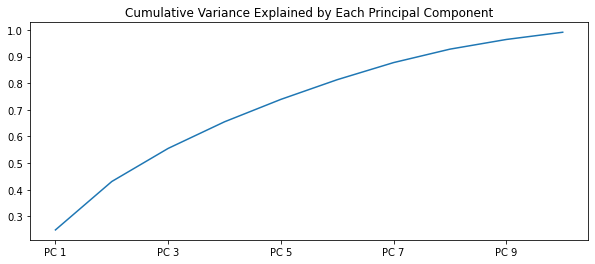

In [23]:
%matplotlib inline
plt.figure(figsize= (10,4))
loadings.iloc[len(loadings)-1].plot()
plt.title("Cumulative Variance Explained by Each Principal Component")


In [24]:
trained_pca_df= pca_df
trained_pca_df['type']= train_df['type']
trained_pca_df

PC 1      PC 2      PC 3      PC 4      PC 5      PC 6      PC 7  \
0     1.860137  1.183007  0.618722 -0.545407  0.255311  0.547491  0.001904   
1    -2.532861  1.067897  1.185219  0.520856 -0.565620  0.405989  1.058941   
2     3.357171  1.305229  0.151249 -1.127781 -0.373275  0.303415  0.216758   
3    -1.119141  0.122733 -1.706402 -0.167885 -0.804165 -0.957682 -0.843934   
4    -1.476817  1.284601 -0.076851 -0.426685 -0.572361  0.872600  0.127360   
...        ...       ...       ...       ...       ...       ...       ...   
2391  2.324344 -1.516301 -1.129960 -0.213838  0.272079 -0.225046 -1.031410   
2392  0.826760 -3.060685  1.207408  0.751758  1.160893  0.212940 -1.228923   
2393  0.925583 -1.686618  0.461565  3.243159  1.324512 -0.250591 -0.595960   
2394 -0.017351  1.649326  0.693402 -0.555478 -2.464528 -0.603995  0.227381   
2395 -2.502657  1.599200  1.036280 -0.109085 -0.505159 -0.542392  0.766591   

          PC 8      PC 9     PC 10  type  
0    -0.764358  0.109853 -0.668773     1  
1     0.127443  0.690425  0.113562     1  
2     2.226757 -1.644447 -0.263215     1  
3    -0.271855  0.517514  0.196273     1  
4    -0.016298 -0.014676 -0.431618     1  
...        ...       ...       ...   ...  
2391  0.672733  0.718639 -0.969081     0  
2392 -0.808713  0.046461  0.213475     0  
2393 -0.204255  0.665860 -0.327341     0  
2394 -1.532745 -0.016481 -1.052842     0  
2395 -0.246723 -0.625504 -0.044441     0  

[2396 rows x 11 columns]

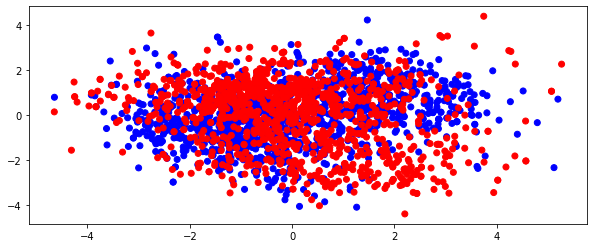

In [25]:
#ax1= trained_pca_df.plot.scatter(x= 'PC 1', y='PC 2', figsize=(20, 10))

fig, ax = plt.subplots(figsize=(10, 4))
colours = {1: 'blue', 0: 'red'}

ax.scatter(trained_pca_df['PC 1'], trained_pca_df['PC 2'], c= trained_pca_df['type'].map(colours))
plt.show()
#separating our data by PC 1 and 2, we know that only 42% of the variability is explained. Looking at our plot below- we can see why!
# so we need more dimensions to separate out our classes of wine

#### 7: Classification 1: K- nearest neighbours (KNN)

We will first use K-NN to classify our data into white/red wines. Our analysis shows that when k=3, we are right about 85% of the time- which is much more than a 50% random guess! We can get our accuracy up to 86% by reducing k to k=1, but this comes at the risk of overfitting our data. 

Accuracy: 0.855
Precision: 0.9049429657794676
Recall: 0.7933333333333333


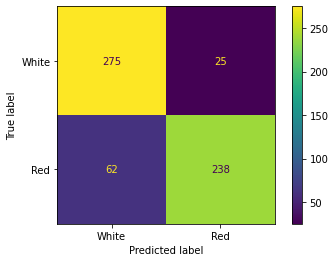

In [47]:
from sklearn.neighbors import KNeighborsClassifier

##Specify K-NN model
model= KNeighborsClassifier(n_neighbors= 3)

features= pca_df.drop(columns='type')
label= trained_pca_df['type']

#Fit model to training data
model.fit(features,label)

#Apply same PCA to test data
test_data = test_df.drop(columns= 'type')
test_pca= pca.transform(test_data)
test_pca_df= pd.DataFrame(data= test_pca, columns= cols)

#use model to predict types
predicted_types = model.predict(test_pca_df)

from sklearn import metrics

#compute accuracy of model
print("Accuracy:",metrics.accuracy_score(test_df['type'], predicted_types))
print("Precision:", metrics.precision_score(test_df['type'], predicted_types))
print("Recall:", metrics.recall_score(test_df['type'], predicted_types))

#print(metrics.confusion_matrix(test_df['type'], predicted_types))

cm= metrics.confusion_matrix(test_df['type'], predicted_types)
cmd= metrics.ConfusionMatrixDisplay(cm, display_labels=['White', 'Red'])
cmd.plot()

##### Confusion Matrices: Accuracy, Precision, and Recall
In order to evaluate how well our model performed, we have multiple statistics to use. The confusion matrix above helps us understand the difference between these terms:
- Accuracy: Number of correct predictions/ Total predictions.
    Here Accuracy= (275+238)/(275+238+62+25)= 0.855
- Precision: True Positive/ True Positive + False Positive = 275/(275+62) = 
- Recall: True Positive/(True Positive + False Negative) = 275/(275+25) = 0.916

#### 8: Classification 2: Decision Trees

Decision trees offer a more interpretable way of classifying items. To make best use of them, we can limit the max depth of branches to a level that is readable, in this case 3. Increasing the max depth also increases the accuracy of our model, to the point where our model can be close to 100% percent accurate if not constrained by depth. However, the problem of overfitting arises here too, as we would likely be overfitting to our testing set.

In [40]:
##Preparing our training and testing data sets (using non-pca data)

features = train_df.drop(columns = 'type')
label = train_df.type

test_features= test_df.drop(columns = 'type')
test_types= test_df.type

## Create Decision Tree object and train
from sklearn import metrics
from sklearn import tree

decisiontree = tree.DecisionTreeClassifier(criterion= "entropy", max_depth = 3)

decisiontree = decisiontree.fit(features,label)

## Test on test dataset 

predicted_types= decisiontree.predict(test_features)

##Model Accuracy

print("Accuracy:", metrics.accuracy_score(test_types, predicted_types))

Accuracy: 0.8033333333333333


In [33]:
fig= plt.figure(figsize=(25,20), dpi=300)

_ = tree.plot_tree(decisiontree, feature_names=features.columns,
                   class_names= ['White', 'Red'], filled=True)
                   
                   

#### 9: Classification 3: Support Vector Machines (SVM)